 **Reference**: <https://seaborn.pydata.org/tutorial/aesthetics.html>

In [33]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [14]:
sns.set_theme()
# 
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Tips and Tricks

function keyword arguments like `hue`, `size`, `style`, ... are aesthetic mapping. If you want to set the size of all points to 5, you can not use `size = 5` because `size` mapping to a column name. You have to set the size of point by using the keyword arguments of lower function. For example, `sns.scatterplot` has lower funcion is `matplotlib.pyplot.scatter`, so to change the size, you set `s = 5`

---
Below, **`sizes`** keyword arguments behaves like **`scale_size_manual`**

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

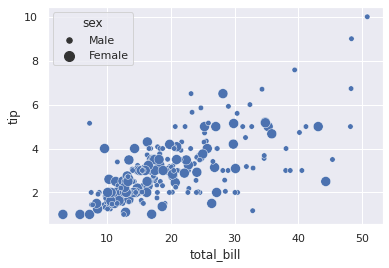

In [10]:
# map sex to aesthetic size, the size of points for male is 30 and for female is 100
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip', size = 'sex', sizes = [30, 100])

**`scale_size_identity()`**

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

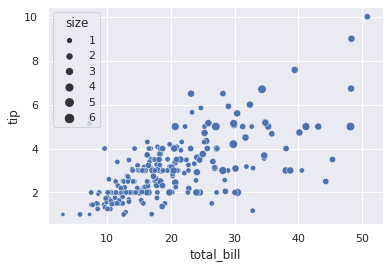

In [19]:
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip', size = 'size')

Set all points to the same size

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

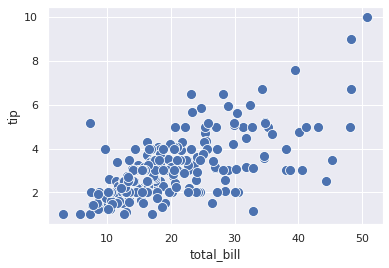

In [11]:
# set the size of all points to 100, `s` is the keyword argument of lower function plt.scatter
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip', s = 100)

---
**`hue`** is aesthemic mapping for color, **`color`** is keyword argument for lower-level function

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

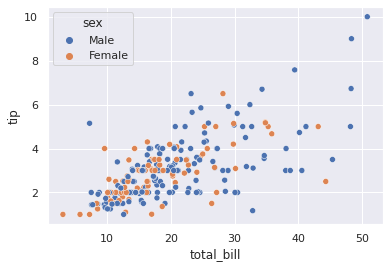

In [12]:
# map sex to aesthetic color
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip' , hue = 'sex')

Customize color aesthetic, use a **`dict`** (like **`scale_color_manual`**)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

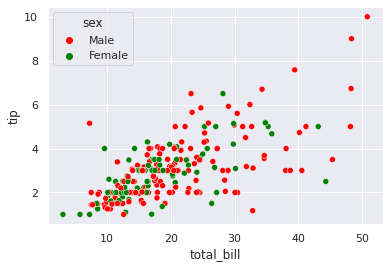

In [8]:
pal = dict(Male = 'red', Female = 'green')
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip', hue = 'sex', palette = pal)

Or use a palette like `Set1` (**`scale_color_discrete`** with palette)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

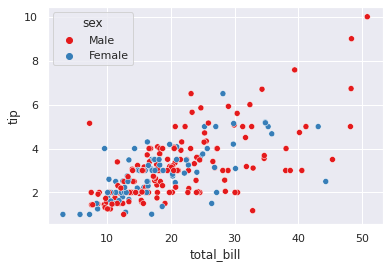

In [9]:
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip', hue = 'sex', palette = 'Set1')

Set all points to the same color using **`color`** keyword argument of low-level function

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

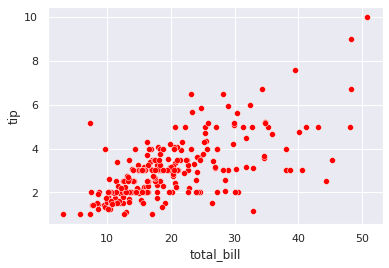

In [13]:
# here, color is the keyword argument of low level function plt.scatter
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip', color = 'red')

---
Map data to aesthetic linetype using **`style`** keyword argument

In [23]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<AxesSubplot:xlabel='year', ylabel='passengers'>

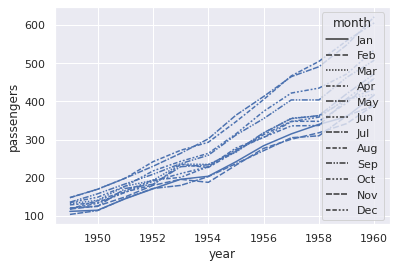

In [28]:
sns.lineplot(data = flights, x = 'year', y = 'passengers', style = 'month')

# Controlling figure aesthetic

## Control the figure style

- **`sns.set_theme()`**
- **`sns.axes_style()`**

 There are five preset seaborn themes: `darkgrid`, `whitegrid`, `dark`, `white`, and `ticks`. They are each suited to different applications and personal preferences. The default theme is darkgrid. As mentioned above, the grid helps the plot serve as a lookup table for quantitative information, and the white-on grey helps to keep the grid from competing with lines that represent data. The whitegrid theme is similar, but it is better suited to plots with heavy data elements:

<AxesSubplot:xlabel='day', ylabel='total_bill'>

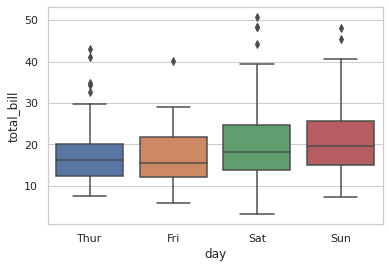

In [31]:
sns.set_style('whitegrid')
sns.boxplot(data = tips, x = 'day', y = 'total_bill')

For many plots, (especially for settings like talks, where you primarily want to use figures to provide impressions of patterns in the data), the grid is less necessary.

In [35]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
        

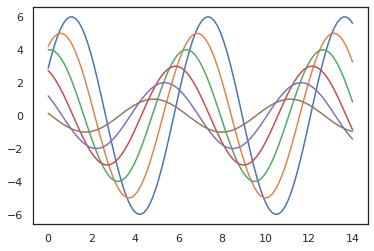

In [36]:
sns.set_style('white')
sinplot()

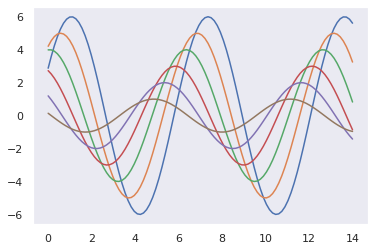

In [37]:
sns.set_style('dark')
sinplot()

Sometimes you might want to give a little extra structure to the plots, which is where ticks come in handy:

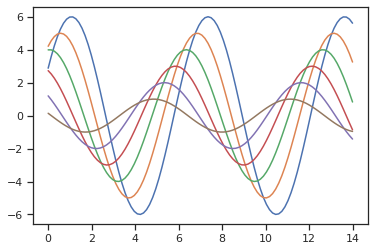

In [41]:
sns.set_style('ticks')
sinplot()

## Removing axes spines

Both the `white` and `ticks` styles can benefit from removing the top and right axes spines, which are not needed using **`sns.despine()`**

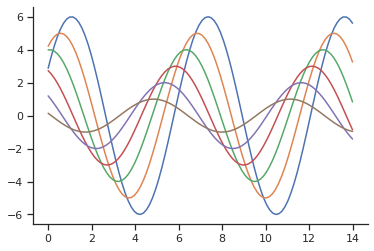

In [42]:
sinplot()
sns.despine()

Some plots benefit from offsetting the spines away from the data, which can also be done when calling `despine()`. When the ticks don’t cover the whole range of the axis, the trim parameter will limit the range of the surviving spines.

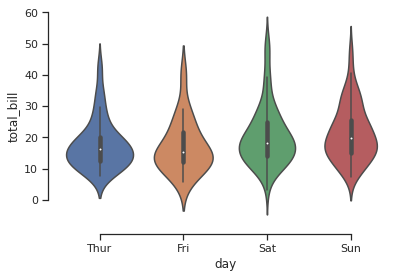

In [47]:
sns.violinplot(data = tips, x = 'day', y = 'total_bill')
sns.despine(offset = 10, trim = True)


You can also control which spines are removed with additional arguments to **`sns.despine()`**:

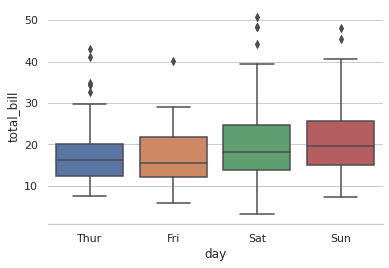

In [49]:
sns.set_style('whitegrid')
sns.boxplot(data = tips, x = 'day', y = 'total_bill')
sns.despine(left = True)

## Temporarily setting figure style

Using `with sns.axes_style("style")`

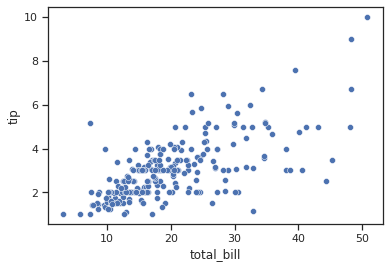

In [51]:
with sns.axes_style('ticks'):
    sns.scatterplot(data = tips, x = 'total_bill', y = 'tip')
    

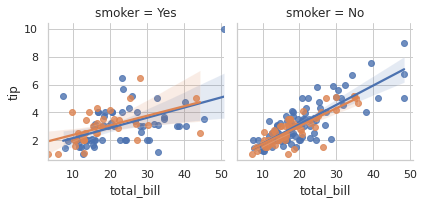

In [55]:
with sns.axes_style('whitegrid'):
    g = sns.FacetGrid(tips, col = 'smoker', hue = 'sex')
    
g.map(sns.regplot, 'total_bill', 'tip')

## Overriding elements of the seaborn styles¶

pass a dict to **`rc`** keyword argument of **`sns.set_style`** or **`sns.axes_style`**

In [56]:
# current setting
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

Customize:

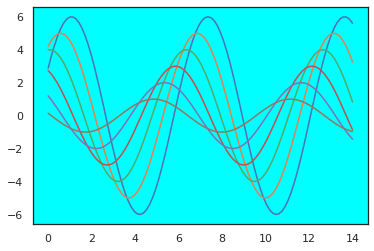

In [58]:
with sns.axes_style('white', rc = {'axes.facecolor': 'cyan'}):
    sinplot()

## Scaling plot elements

- **`sns.set_context()`**
- **`sns.plotting_context()`**

A separate set of parameters control the scale of plot elements, which should let you use the same code to make plots that are suited for use in settings where larger or smaller plots are appropriate.

In [59]:
# reset default parameters
sns.set_theme()

The four preset contexts, in order of relative size, are `paper`, `notebook`, `talk`, and `poster`. The notebook style is the default, and was used in the plots above.

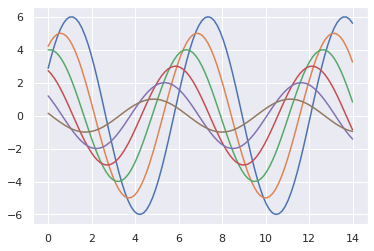

In [60]:
sinplot()

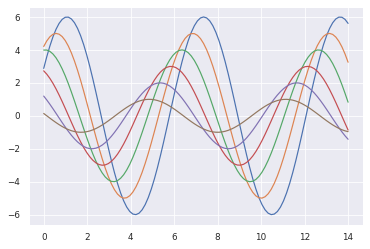

In [61]:
sns.set_context('paper')
sinplot()

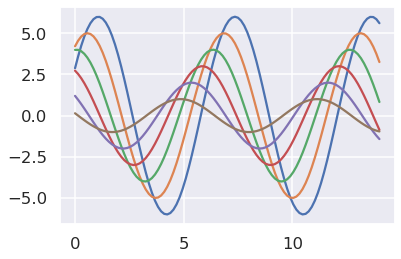

In [62]:
sns.set_context('talk')
sinplot()

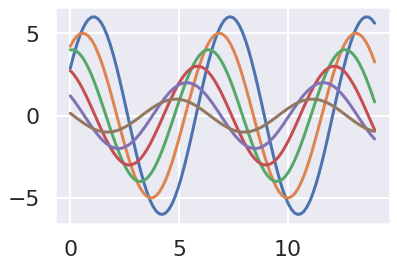

In [63]:
sns.set_context('poster')
sinplot()

Most of what you now know about the style functions should transfer to the context functions.

You can call `set_context()` with one of these names to set the parameters, and you can override the parameters by providing a dictionary of parameter values.

You can also independently scale the size of the font elements when changing the context. (This option is also available through the top-level `set()` function).

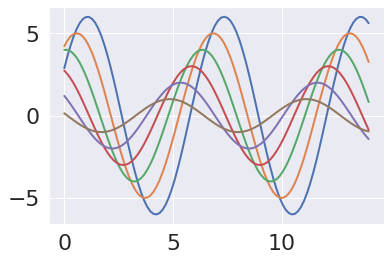

In [69]:
sns.set_context('notebook', font_scale = 2, rc = {'lines.linewidth': 2})
sinplot()

In [70]:
?sns.set_context

Signature: sns.set_context(context=None, font_scale=1, rc=None)
Docstring:
Set the plotting context parameters.

This affects things like the size of the labels, lines, and other
elements of the plot, but not the overall style. The base context
is "notebook", and the other contexts are "paper", "talk", and "poster",
which are version of the notebook parameters scaled by .8, 1.3, and 1.6,
respectively.

Parameters
----------
context : dict, None, or one of {paper, notebook, talk, poster}
    A dictionary of parameters or the name of a preconfigured set.
font_scale : float, optional
    Separate scaling factor to independently scale the size of the
    font elements.
rc : dict, optional
    Parameter mappings to override the values in the preset seaborn
    context dictionaries. This only updates parameters that are
    considered part of the context definition.

Examples
--------
>>> set_context("paper")

>>> set_context("talk", font_scale=1.4)

>>> set_context("talk", rc={"lines.linewi

you can temporarily control the scale of figures nested under a with statement.



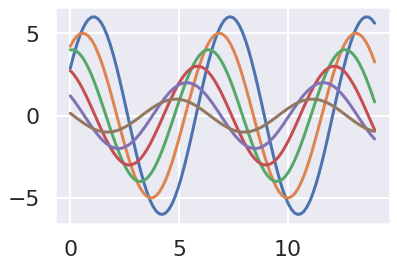

In [71]:
with sns.plotting_context('poster'):
    sinplot()

In [72]:
sns.plotting_context?

Signature: sns.plotting_context(context=None, font_scale=1, rc=None)
Docstring:
Return a parameter dict to scale elements of the figure.

This affects things like the size of the labels, lines, and other
elements of the plot, but not the overall style. The base context
is "notebook", and the other contexts are "paper", "talk", and "poster",
which are version of the notebook parameters scaled by .8, 1.3, and 1.6,
respectively.

This function returns an object that can be used in a ``with`` statement
to temporarily change the context parameters.

Parameters
----------
context : dict, None, or one of {paper, notebook, talk, poster}
    A dictionary of parameters or the name of a preconfigured set.
font_scale : float, optional
    Separate scaling factor to independently scale the size of the
    font elements.
rc : dict, optional
    Parameter mappings to override the values in the preset seaborn
    context dictionaries. This only updates parameters that are
    considered part of the co

<b style = 'color:red'>NOTE</b>: Both the style and the context can be quickly configured with the `set()` function. This function also sets the default color palette